# Part II - Prosper Loan Dataset
## by Aisha Lawal


## Investigation Overview


> I found some very interesting features and correlations in this dataset. A summary of such findings include: 
1. The distribution of BorrowerAPR is a multimodal distribution
2. The loan origin amount are skewed and dont follow a normal distribution. Furthermore, the most frequesnt loaned amount is 4,000 and the least is 2388
3. More people completed thier loan than those that defaulted.
4. There are some negative correlation between some values like BorrowAPR vs ProsperScore and BorrowerAPR vs LoanOriginalAmount. Also a strong positive correlation between loanoroginalamount and monthlyloanpayment- amongst others.
5. The loan amount increases with the loan term.
6. The fact that loans within a shorter period of time had to be paid quicker so the monthly payment was higher.

> **Key Insights**: Amongst the findings listed above, some we will cover in the presentation includes:the correlation between all variables, the distribution of borrower APR, the relationship between LoanOriginalAmount, MonthlyLoanPayment, and Term. Also, i will be looking at the relatioship between BorrowerAPR vs LoanOriginalAmount


## Dataset Overview

> The dataset used was the prosper loan dataset. It consisted of borrower APRs. It had a total entry of 113,937 individual loans. The features included in the data set include:  borrower's Prosper rating, loan term,original loan amount, borrower's stated monthly income,  employment status, debt to income ratio, current loan status etc. There were a toral of 81 features given in the dataset. However, for the analusis of the dataset, only 13 were used which are" 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus','EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate', 'MonthlyLoanPayment'.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


Exploring BorrowerAPR
> Analysing the Borrower APR Distribution

In [10]:
interested_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                    'LoanOriginationDate', 'MonthlyLoanPayment']
loan_df = df[interested_variables]
loan_df.dropna(inplace = True)



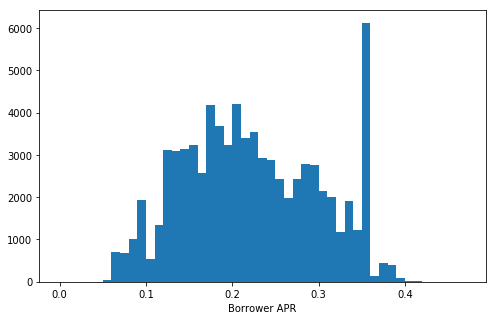

In [11]:
#plotting distribiution
bins = np.arange(0, loan_df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

## Observation
   > The distribution of BorrowerAPR looks is a multimodal distribution



Exploring Correlation between variables
> Looking at whether the variables are positive, negative or not correlated.

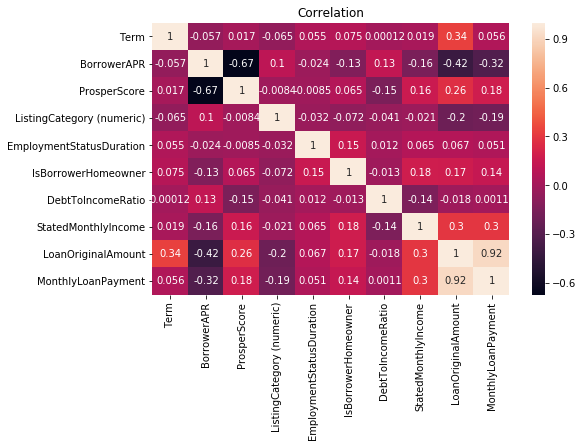

In [12]:
plt.figure(figsize = [8, 5])
sb.heatmap(loan_df.corr(), annot=True)
plt.title("Correlation");

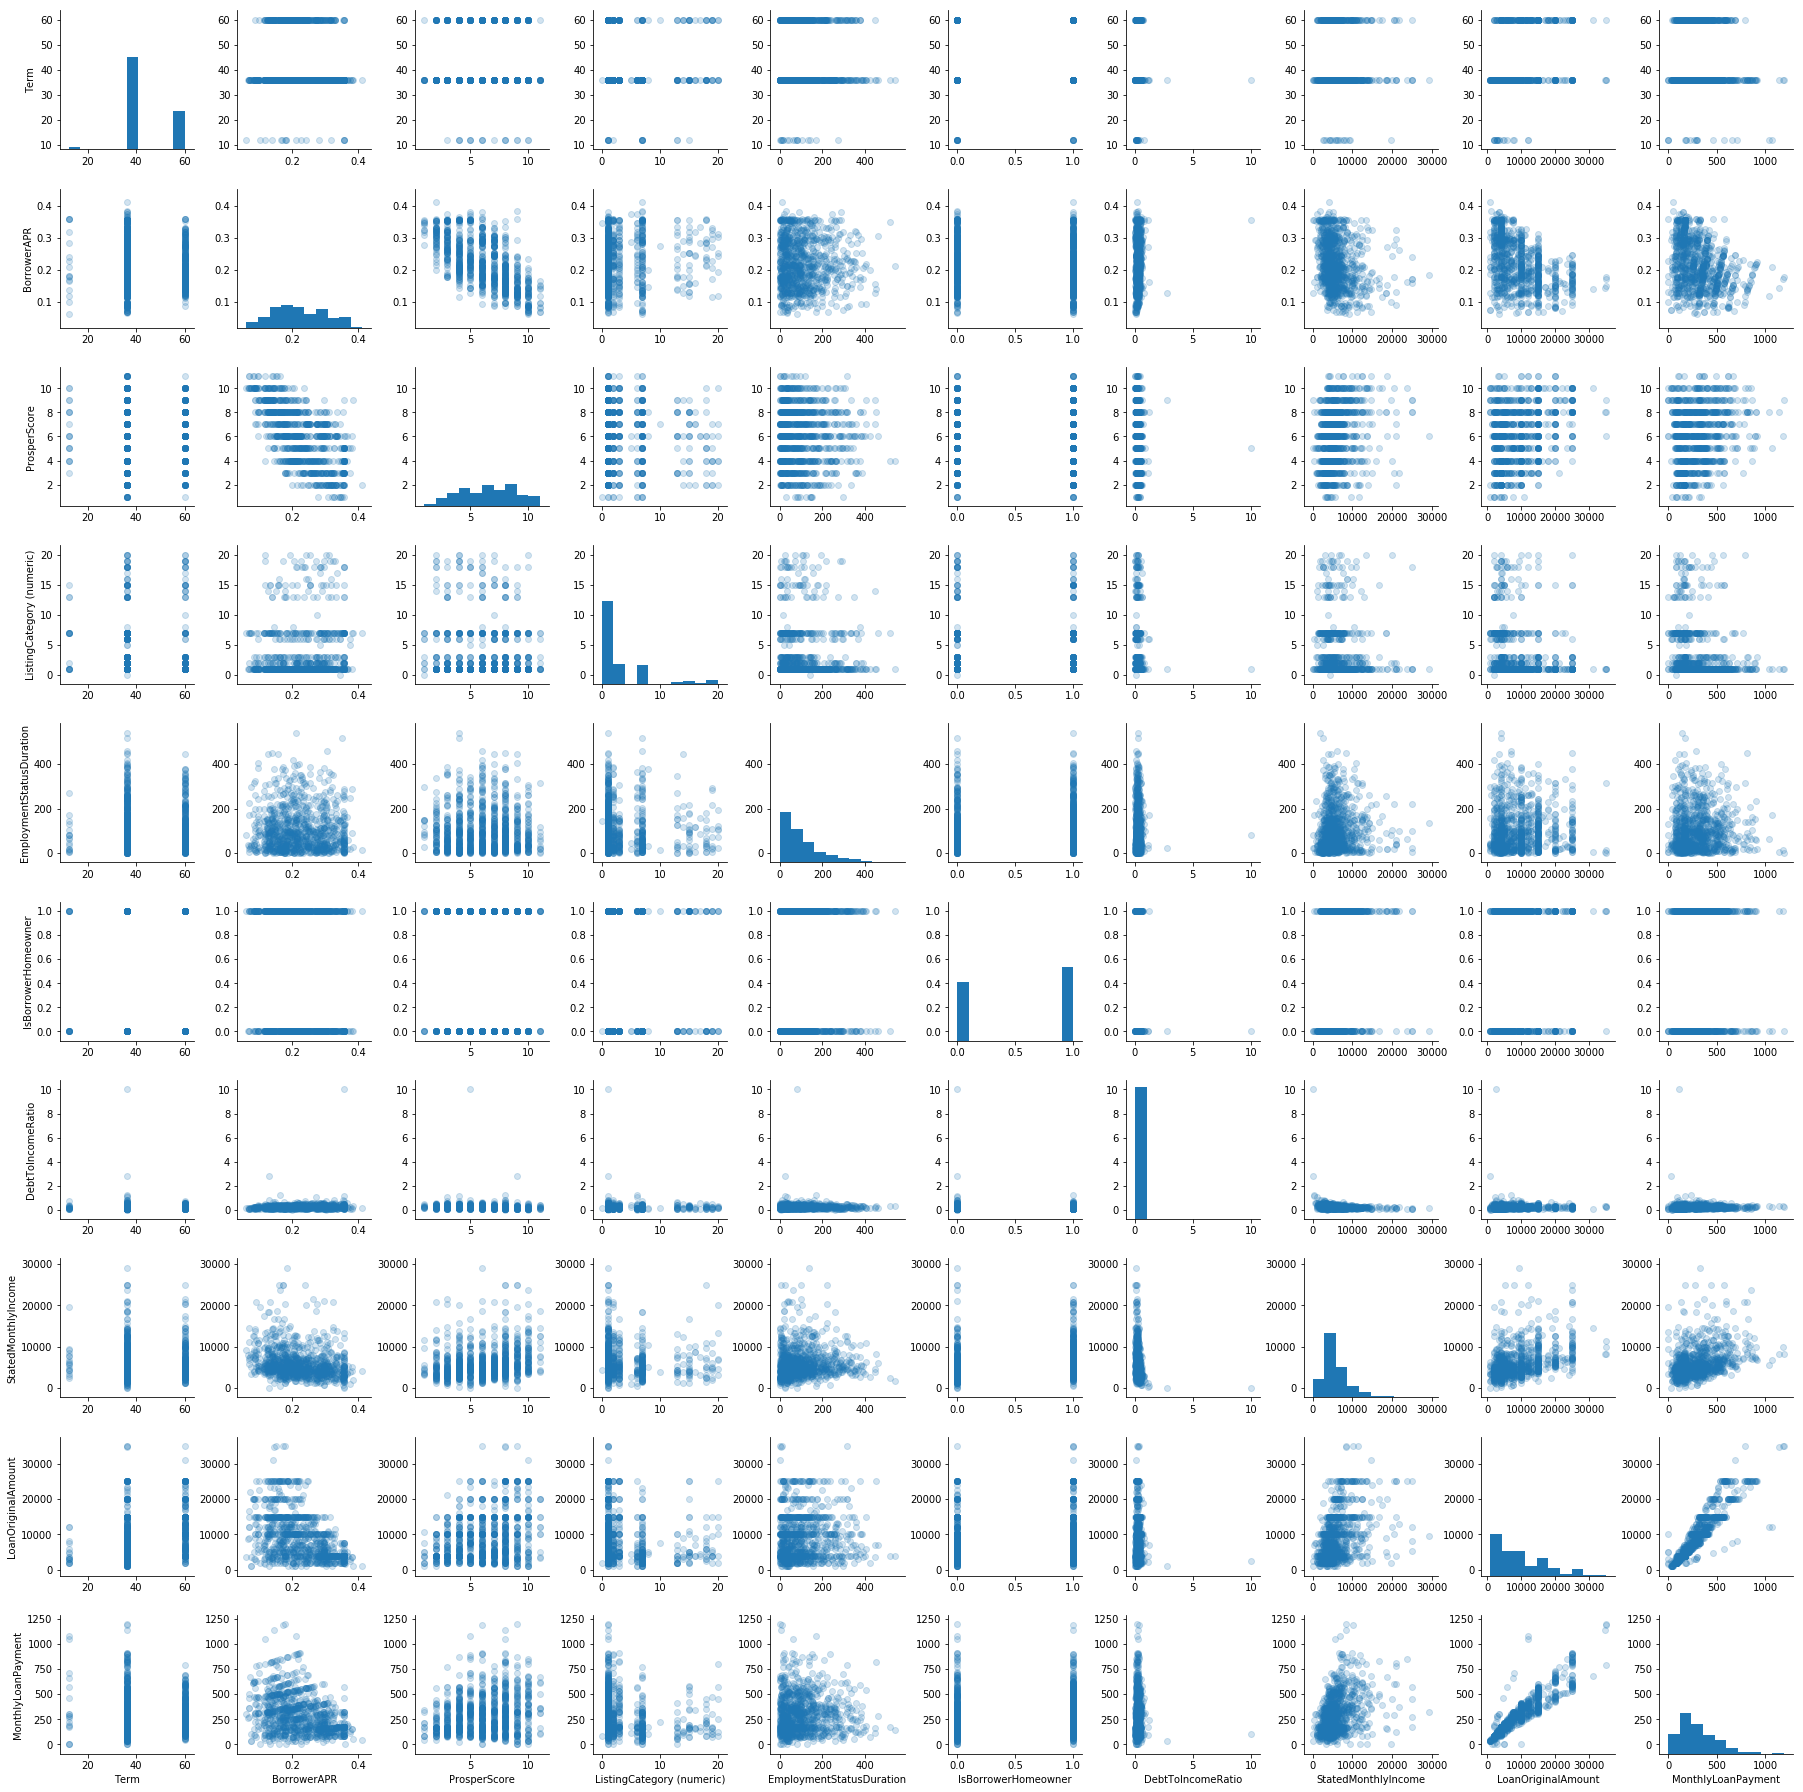

In [13]:
#using seaborn 
# lets sample 1000
loan_plot = loan_df.sample(1000)
g = sb.PairGrid(data = loan_plot.dropna())
g = g.map_diag(plt.hist, bins=10)
g.map_offdiag(plt.scatter, alpha=0.2);

## Observation
   > We observe a negative correlation between some values like BorrowAPR and ProsperScore. Also a strong positive correlation between loanoroginalamount and monthlyloanpayment

Exploring BorrowerAPR vs LoanOriginalAmount
> Relationship between BorrowerAPR vs LoanOriginalAmount

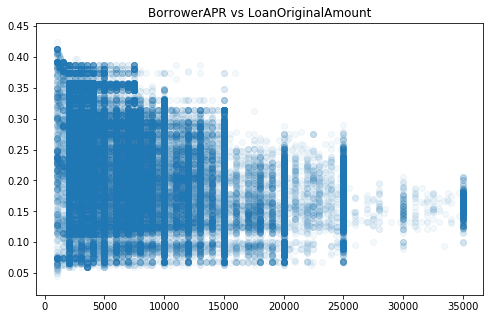

In [14]:
plt.figure(figsize = [8, 5])
plt.scatter(data = loan_df,x = 'LoanOriginalAmount' , y = 'BorrowerAPR', alpha = 0.05)
plt.title("BorrowerAPR vs LoanOriginalAmount");

## Observation
   > We observe a negavive correlation between BorrowerAPR and LoanOriginalAmount

Exploring LoanOriginalAmount, MonthlyLoanPayment, and Term
> Lets look at the relationship between LoanOriginalAmount vs MonthlyLoanPayment with a 3rd variable as the term

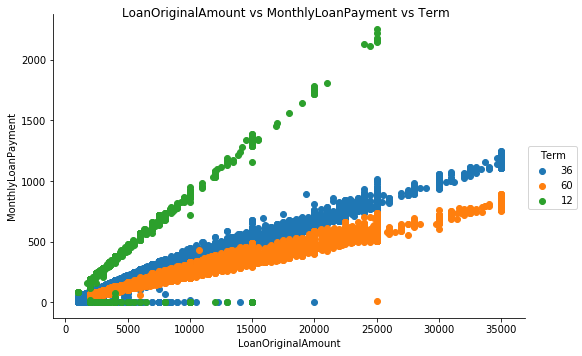

In [15]:
g = sb.FacetGrid(data = loan_df, hue = 'Term',hue_order = [36, 60, 12], size = 5, aspect = 1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment vs Term");
